In [1]:
# INF2178
# Assignment 4
# Lan Li
# Student Number: 1005814326

# Set working directory
%cd /content/sample_data

/content/sample_data


In [2]:
# Import the packages needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
%pip install dfply
from dfply import *
from statsmodels.graphics.factorplots import interaction_plot
%pip install pingouin
import pingouin as pg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=85740306461457374e5f916849bc7422a958d73a8378db6ffed6450cce61df8e
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.4/612.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 4.5 MB/s eta 0:00:00


In [3]:
# Read the csv file as data frame
df = pd.read_csv('INF2178_A4_data.csv')
df.drop(df.columns[0], axis=1, inplace=True)

# Display the first few rows of the dataframe
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
290,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
291,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
292,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


In [4]:
missing_values = df.isnull().sum()
print(missing_values)

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           15
MMSE           1
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [5]:
# Drop all the NAs
df_cleaned = df.dropna().reset_index(drop=True)

df_cleaned

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
275,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
276,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
277,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331


# EDA

In [6]:
df_cleaned.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,1.491039,353.200717,76.394265,14.684588,2.491039,27.318996,0.284946,1479.433692,0.731703,1.202577
std,0.500818,404.525563,7.775314,2.901404,1.128008,3.435222,0.382141,176.748150,0.038061,0.138758
min,1.000000,0.000000,60.000000,6.000000,1.000000,15.000000,0.000000,1106.000000,0.646000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,26.000000,0.000000,1348.500000,0.702000,1.118500
50%,1.000000,0.000000,76.000000,15.000000,2.000000,29.000000,0.000000,1461.000000,0.732000,1.202000
75%,2.000000,673.000000,82.000000,16.500000,3.000000,30.000000,0.500000,1568.500000,0.757000,1.301500
max,2.000000,1707.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  279 non-null    object 
 1   MRI ID      279 non-null    object 
 2   Group       279 non-null    object 
 3   Visit       279 non-null    int64  
 4   MR Delay    279 non-null    int64  
 5   M/F         279 non-null    object 
 6   Hand        279 non-null    object 
 7   Age         279 non-null    int64  
 8   EDUC        279 non-null    int64  
 9   SES         279 non-null    float64
 10  MMSE        279 non-null    float64
 11  CDR         279 non-null    float64
 12  eTIV        279 non-null    int64  
 13  nWBV        279 non-null    float64
 14  ASF         279 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 32.8+ KB


<ipython-input-8-e69fc6920132>:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(data=df_cleaned, x='Visit', y='nWBV', hue='M/F', dodge=True, markers=['o', 's'],


<Axes: xlabel='Visit', ylabel='nWBV'>

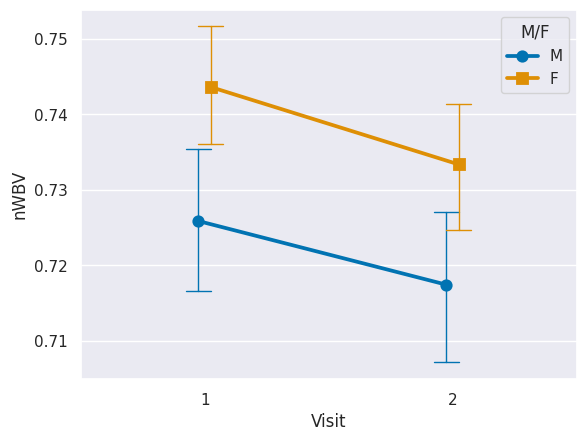

In [8]:
sns.set()
sns.pointplot(data=df_cleaned, x='Visit', y='nWBV', hue='M/F', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [9]:
df.groupby(['Visit', 'M/F'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit M/F            
1     F    0.74  0.04
      M    0.73  0.04
2     F    0.73  0.04
      M    0.72  0.04

<Axes: xlabel='Visit', ylabel='nWBV'>

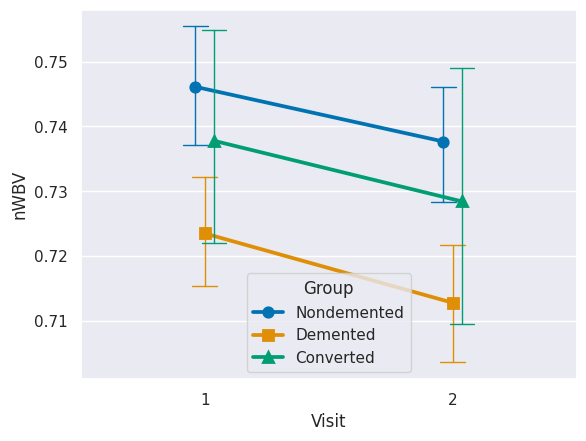

In [10]:
df_cleaned['CDR'] = df_cleaned['CDR'].astype('object')
df_cleaned['Group'] = df_cleaned['Group'].astype('object')
df_cleaned['Visit'] = df_cleaned['Visit'].astype('object')
sns.pointplot(data=df_cleaned, x='Visit', y='nWBV', hue='Group', dodge=True,
              markers=['o', 's', '^'],  # Add an additional marker for the third category
              capsize=.1, err_kws={'linewidth': 1}, palette='colorblind')

In [11]:
df.groupby(['Visit', 'Group'])['nWBV'].agg(['mean', 'std']).round(2)

mean   std
Visit Group                  
1     Converted    0.74  0.03
      Demented     0.72  0.03
      Nondemented  0.75  0.04
2     Converted    0.73  0.04
      Demented     0.71  0.03
      Nondemented  0.74  0.04

# Mixed ANOVA

In [12]:
# Compute the two-way mixed-design ANOVA：Visit and Gender
aov_1 = pg.mixed_anova(dv='nWBV', within='Visit', between='M/F', subject='Subject ID', data=df_cleaned)
pg.print_table(aov_1)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
M/F          0.019      1    135  0.019   6.902    0.010  0.049  nan
Visit        0.006      1    135  0.006  88.308    0.000  0.395    1.000
Interaction  0.000      1    135  0.000   0.621    0.432  0.005  nan



In [13]:
# post hoc test
posthocs_1 = pg.pairwise_ttests(dv='nWBV', within='Visit', between='M/F', subject='Subject ID', data=df_cleaned)
pg.print_table(posthocs_1)


POST HOC TESTS

Contrast     Visit    A    B    Paired    Parametric        T      dof  alternative      p-unc                BF10    hedges
-----------  -------  ---  ---  --------  ------------  -----  -------  -------------  -------  ------------------  --------
Visit        -        1    2    True      True          9.410  136.000  two-sided        0.000  35120000000000.000     0.251
M/F          -        F    M    False     True          2.615  116.517  two-sided        0.010               4.002     0.454
Visit * M/F  1        F    M    False     True          2.769  117.838  two-sided        0.007               5.762     0.479
Visit * M/F  2        F    M    False     True          2.409  116.234  two-sided        0.018               2.529     0.418



/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)


In [14]:
# Compute the two-way mixed-design ANOVA：Visit and Group
aov_2 = pg.mixed_anova(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df_cleaned)
pg.print_table(aov_2)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS       F    p-unc    np2      eps
-----------  -----  -----  -----  -----  ------  -------  -----  -------
Group        0.033      2    134  0.017   6.384    0.002  0.087  nan
Visit        0.006      1    134  0.006  89.376    0.000  0.400    1.000
Interaction  0.000      2    134  0.000   1.630    0.200  0.024  nan



In [20]:
# post hoc test
posthocs_2 = pg.pairwise_ttests(dv='nWBV', within='Visit', between='Group', subject='Subject ID', data=df_cleaned)
pg.print_table(posthocs_2)

/usr/local/lib/python3.10/dist-packages/pingouin/pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)



POST HOC TESTS

Contrast       Visit    A          B            Paired    Parametric         T      dof  alternative      p-unc                BF10    hedges
-------------  -------  ---------  -----------  --------  ------------  ------  -------  -------------  -------  ------------------  --------
Visit          -        1          2            True      True           9.410  136.000  two-sided        0.000  35120000000000.000     0.251
Group          -        Converted  Demented     False     True           1.436   15.523  two-sided        0.171               0.698     0.471
Group          -        Converted  Nondemented  False     True          -0.648   15.832  two-sided        0.527               0.361    -0.188
Group          -        Demented   Nondemented  False     True          -3.620  121.919  two-sided        0.000              59.810    -0.637
Visit * Group  1        Converted  Demented     False     True           1.467   15.433  two-sided        0.162               0.724

In [18]:
normality_results = pg.normality(data=df_cleaned, dv='nWBV', group='Visit')

# Check for homogeneity of variances
homogeneity_results = pg.homoscedasticity(data=df_cleaned, dv='nWBV', group='Visit')
print(normality_results)
print(homogeneity_results)

              W      pval  normal
Visit                            
1      0.989894  0.397353    True
2      0.988930  0.345926    True
               W      pval  equal_var
levene  0.404703  0.525196       True


# Power Analysis

In [16]:
from statsmodels.stats.power import TTestIndPower

# Parameters for the power analysis
effect_size = 0.7  # Presumed effect size
alpha = 0.05       # Significance level
power = 0.91       # Desired power

# Create an instance of the TTestIndPower class
power_analysis = TTestIndPower()

# Calculate the required sample size
n = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

# Print the result
print(f'Sample size needed in each group: {n:.3f}')


Sample size needed in each group: 45.451


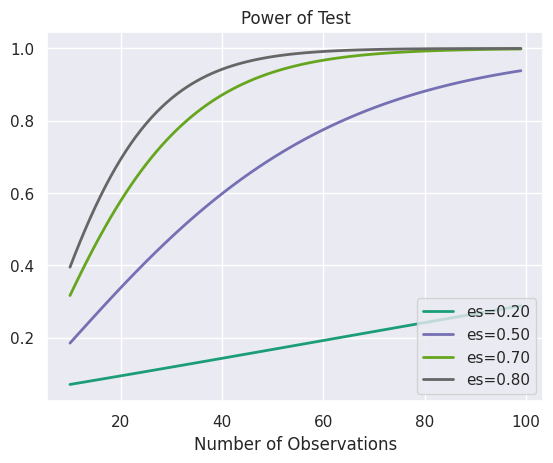

In [17]:
# Define the parameters for the power analysis plot
effect_sizes = np.array([0.2, 0.5, 0.7, 0.8])  # Array of effect sizes to consider
sample_sizes = np.arange(10, 100)  # Range of sample sizes to include on the x-axis

# Create a power analysis plot
power_analysis.plot_power(dep_var='nobs',
                          nobs=sample_sizes,
                          effect_size=effect_sizes,
                          alpha=0.05)  # Fixed alpha

# Display the plot
plt.show()